<a href="https://colab.research.google.com/github/heyrobin/Movie-Sales-Prediction-/blob/main/TMDB_Box_Office_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd

In [41]:
main_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/train.csv')
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/test.csv')
submission_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/sample_submission.csv')

# New section

In [42]:
main_df.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [43]:
print(main_df.shape)

(3000, 23)


In [44]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [45]:
main_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [46]:
main_df.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1772341,en,Hercules,A stranger stumbles into the desert town of Ab...,NaN,/3fBuFmNLTDKuL3QOlgeIvLdekJn.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Three Musketeers,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe4286c3a36847f8025d91', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [47]:
main_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [48]:
test_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
original_language           0
imdb_id                     0
original_title              0
popularity                  0
budget                      0
id                          0
dtype: int64

# EDA

In [49]:
eda = main_df.copy()

In [50]:
eda.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [51]:
import warnings; warnings.filterwarnings('ignore')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
eda_num = eda.select_dtypes(exclude='object')
eda_num.columns

Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')

In [54]:
eda_num_columns = ['budget', 'popularity', 'runtime']

In [55]:
list(enumerate(eda_num_columns))

[(0, 'budget'), (1, 'popularity'), (2, 'runtime')]

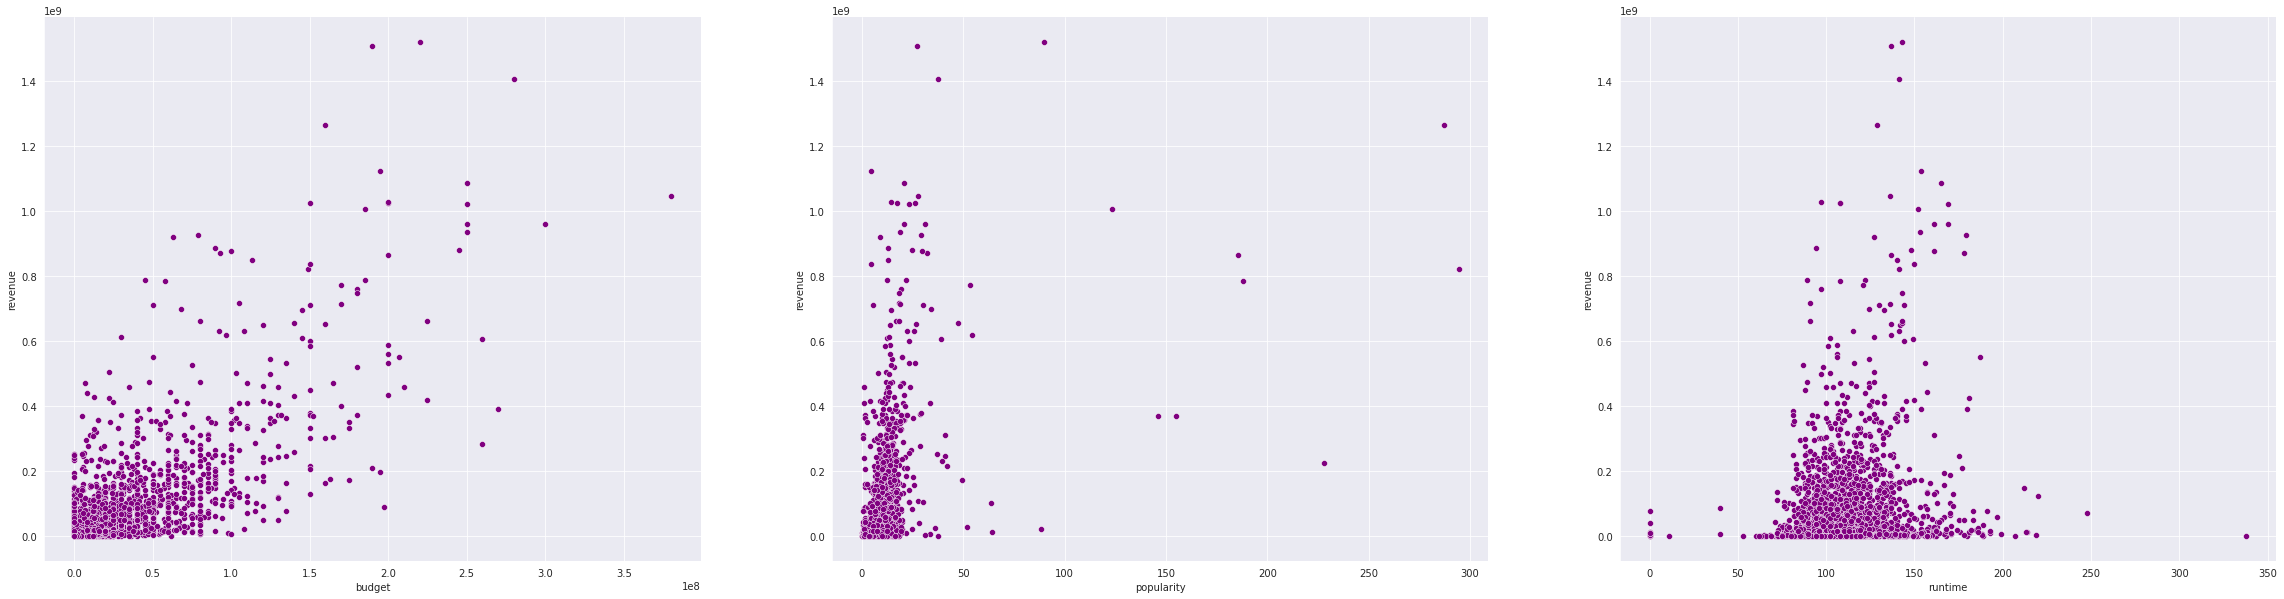

In [56]:
Y = eda['revenue']
plt.figure(figsize=(40,10))
sns.set_style("darkgrid")
sns.color_palette("rocket_r", as_cmap=True)




for i in enumerate(eda_num_columns):
    plt.subplot(1,3,i[0]+1)
    sns.scatterplot(x=eda[i[1]], y=Y, color='purple')
    sns.despine()
    

In [57]:
from scipy.stats import norm

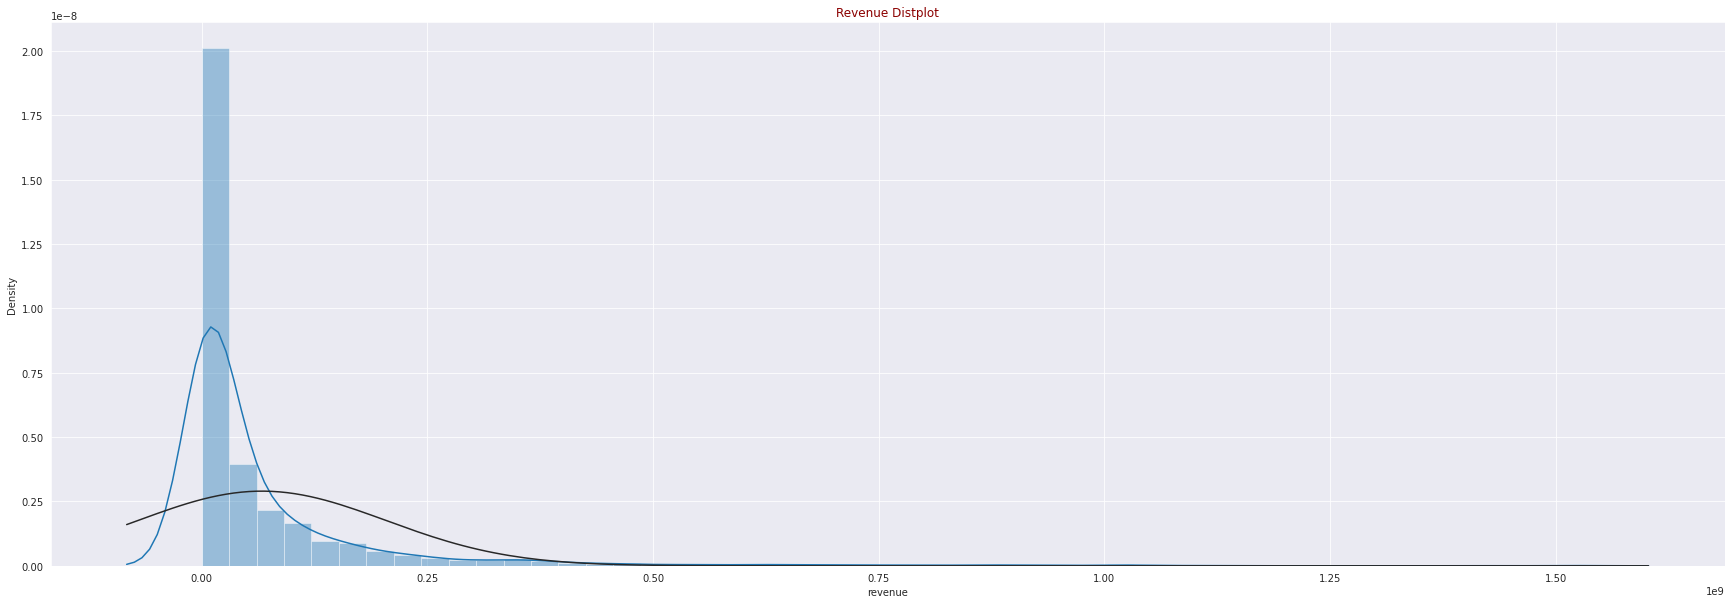

In [58]:
plt.figure(figsize=(30,10))

sns.distplot(eda["revenue"], fit=norm)
plt.title("Revenue Distplot", color = "darkred")
plt.show()

our target variable is skewed converting it to log.

In [59]:
import numpy as np


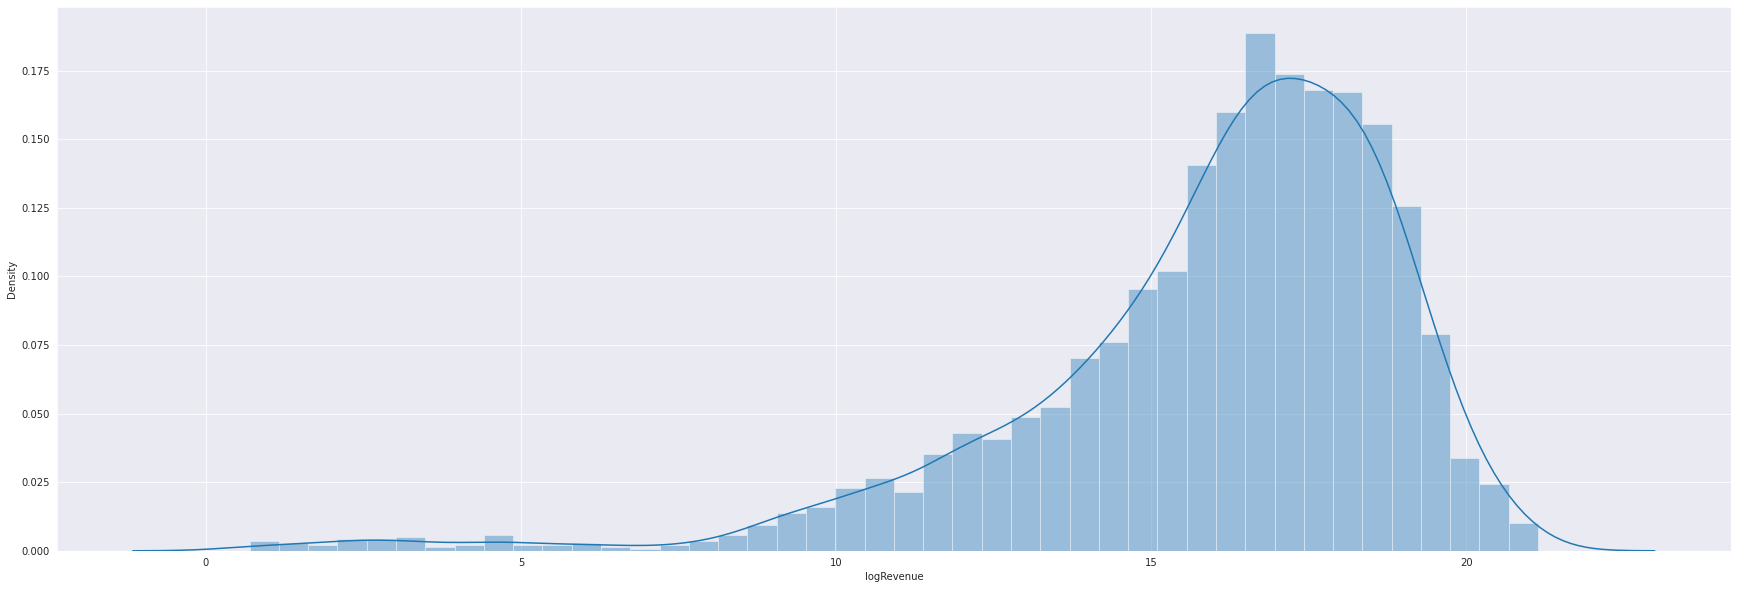

In [60]:
plt.figure(figsize=(30,10))

eda['logRevenue'] = np.log1p(eda['revenue'])
sns.distplot(eda['logRevenue'] );

In [61]:
def date_fuction(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month']  = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df.drop(columns=['release_date'], inplace=True)
    return df

In [62]:
main_df = date_fuction(main_df)
test_df = date_fuction(test_df)

In [63]:
main_df['release_year'].sort_values().unique()

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2021, 2024, 2025, 2026, 2027, 2028, 2030, 2031,
       2032, 2033, 2035, 2036, 2038, 2039, 2040, 2042, 2043, 2044, 2045,
       2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057,
       2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068,
       2069, 2070])

There are more movie released in future too. but how? Lets see what are we looking at here

In [64]:
main_df.iloc[np.where(main_df['release_year']== 2021)]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter
1763,1764,NaN,250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0012349,en,The Kid,Considered one of Charlie Chaplin's best films...,8.168456,/drgMcyTsySQBnUPGaBThCHGdlWT.jpg,"[{'name': 'Charles Chaplin Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",68.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,6 reels of Joy.,The Kid,"[{'id': 290, 'name': 'angel'}, {'id': 1252, 'n...","[{'cast_id': 10, 'character': 'A Tramp', 'cred...","[{'credit_id': '52fe43269251416c75005605', 'de...",2500000,2021,1,21,1


In [65]:
main_df.iloc[np.where(main_df['release_year']== 2017)][:1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter
48,49,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt1781058,en,Wilson,"Middle-aged and divorced, Wilson finds himself...",8.984386,/m63h5MxevYrKn3720hVgKZAx86S.jpg,"[{'name': 'Ad Hominem Enterprises', 'id': 2361}]","[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wilson,"[{'id': 2487, 'name': 'naivety'}, {'id': 2794,...","[{'cast_id': 5, 'character': 'Wilson', 'credit...","[{'credit_id': '5590cb95c3a36807f6000075', 'de...",653951,2017,3,24,1


after Analyzing we find out that the movie released in future are seems to be the movie from the past. The Kid movie released in 1921 but data is recorded 2021. After futher research we found that all the data after 2017 is indeed from 100 years back.

In [66]:
main_df['release_year'] = np.where(main_df['release_year'] > 2019, main_df['release_year']-100,main_df['release_year'])
test_df['release_year'] = np.where(test_df['release_year'] > 2019, test_df['release_year']-100,test_df['release_year'])

In [67]:
main_df.iloc[np.where(main_df['release_year']== 2021)]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter


In [68]:
main_df['release_year'].sort_values().unique()

array([1921, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1933, 1935,
       1936, 1938, 1939, 1940, 1942, 1943, 1944, 1945, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [69]:
main_df.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
imdb_id                     0
original_language           0
budget                      0
original_title              0
release_quarter             0
popularity                  0
release_day                 0
status                      0
title                       0
revenue                     0
release_year                0
release_month               0
id                          0
dtype: int64

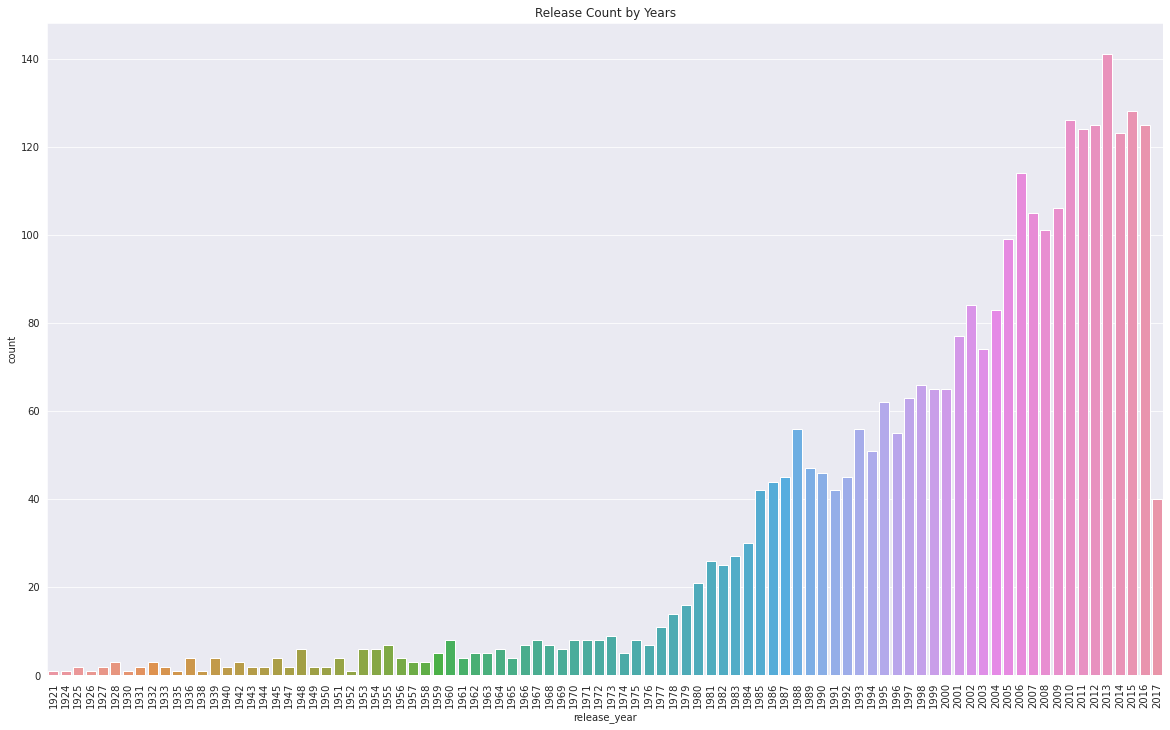

In [73]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Years')
sns.countplot(main_df['release_year']);

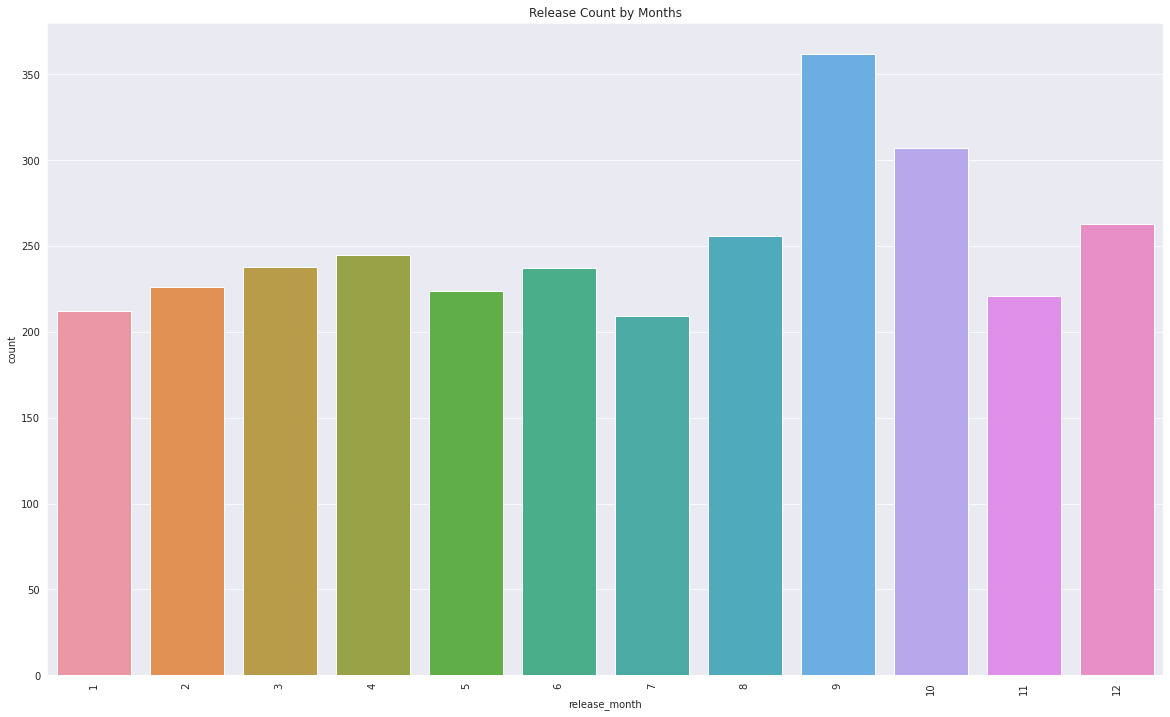

In [74]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Months')
sns.countplot(main_df['release_month']);

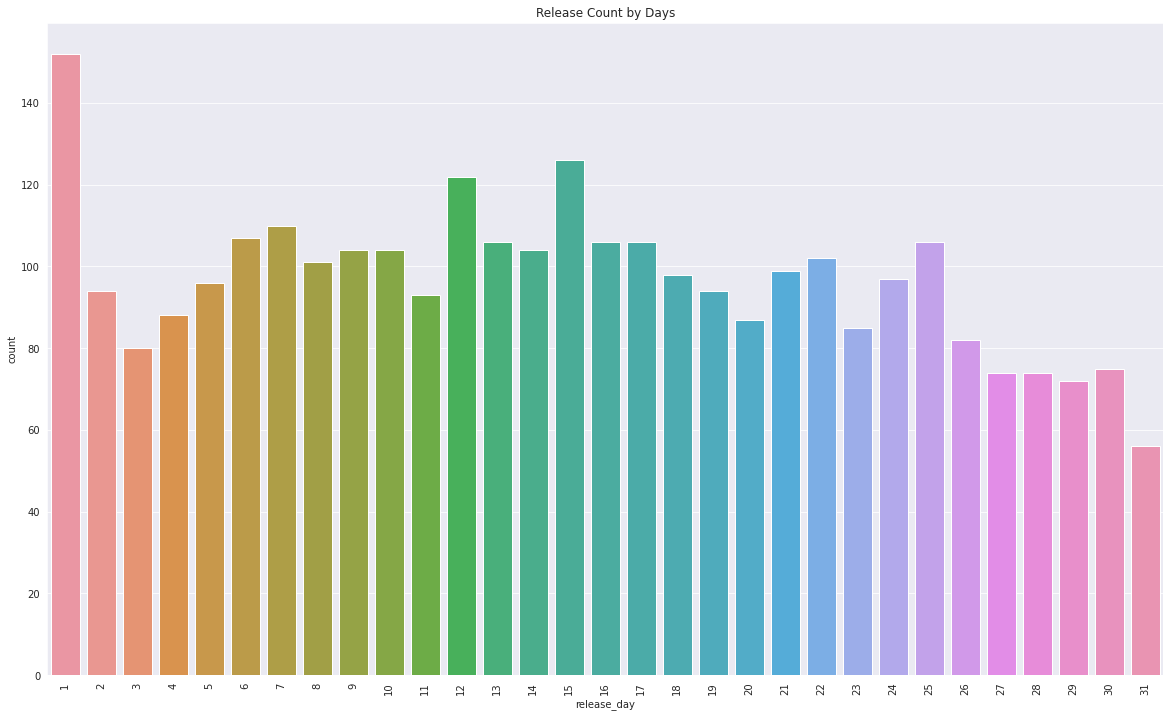

In [75]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Days')
sns.countplot(main_df['release_day']);

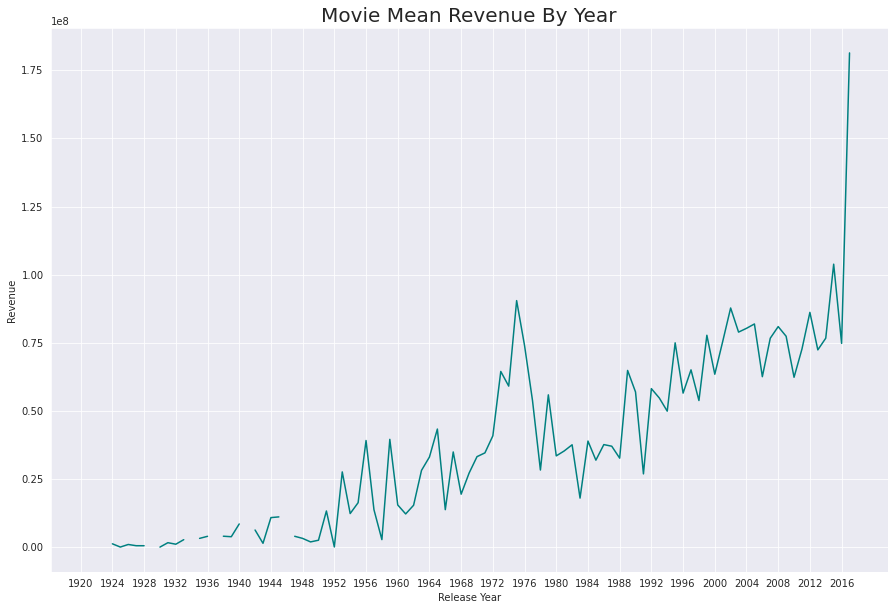

In [91]:
main_df['meanRevenueByYear'] = main_df.groupby("release_year")["revenue"].aggregate('mean')
main_df['meanRevenueByYear'].plot(figsize=(15,10),color="teal")
plt.xticks(np.arange(1920,2020,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

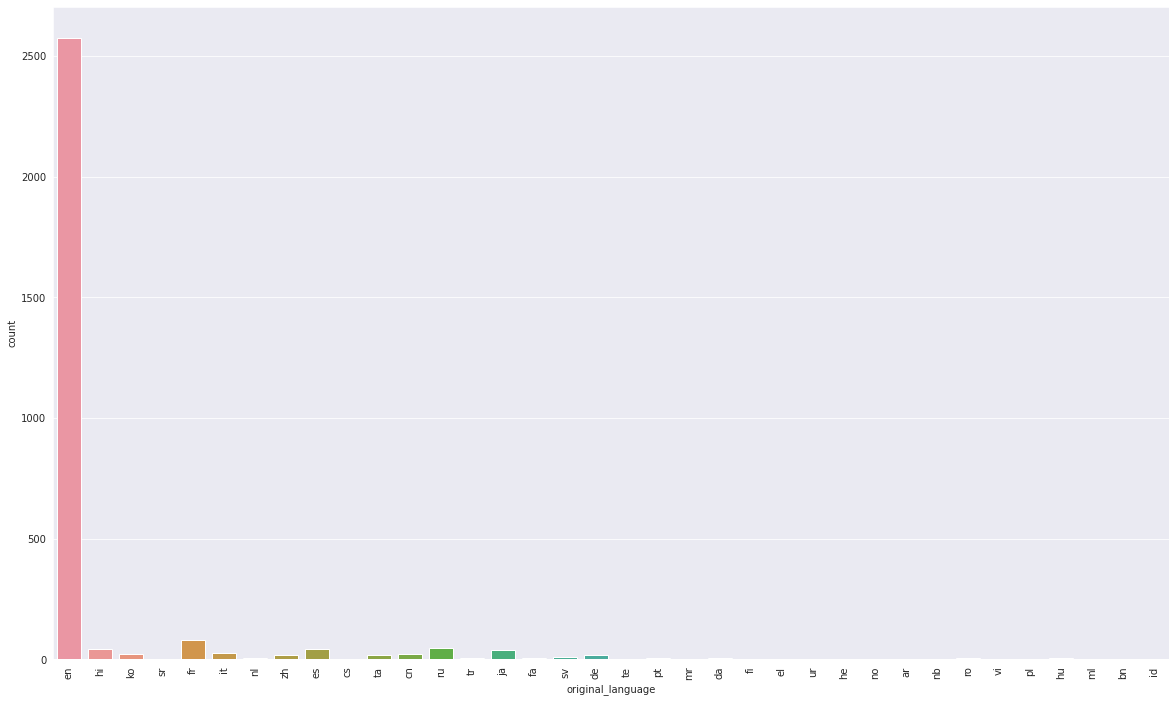

In [90]:
plt.figure(figsize=(20,12))
sns.countplot(main_df['original_language'])
plt.xticks(rotation = 90);